## Import Required Liabrary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import os
import cv2
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')
from keras.models import load_model

In [15]:
from tensorflow.keras.losses import CategoricalCrossentropy

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout,MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

###### First step is to access the folder and image
###### This code is only for understanding purpose about the right path

In [3]:
def access_folders_and_images(path, categories):
    folders_and_images = []
    
    for category in categories:
        folder_path = os.path.join(path, category)
        folders_and_images.append(folder_path)

    return folders_and_images

# Example usage:
path_to_data = r"C:\Users\Akash\OneDrive\Desktop\cloud\Driver"
categories = ['other_activities', 'safe_driving', 'talking_phone', 'texting_phone', 'turning']

result = access_folders_and_images(path_to_data, categories)
result


['C:\\Users\\Akash\\OneDrive\\Desktop\\cloud\\Driver\\other_activities',
 'C:\\Users\\Akash\\OneDrive\\Desktop\\cloud\\Driver\\safe_driving',
 'C:\\Users\\Akash\\OneDrive\\Desktop\\cloud\\Driver\\talking_phone',
 'C:\\Users\\Akash\\OneDrive\\Desktop\\cloud\\Driver\\texting_phone',
 'C:\\Users\\Akash\\OneDrive\\Desktop\\cloud\\Driver\\turning']

###### This code is only for understanding purpose about the right path of accessing individual image in folder

In [4]:
def access_individual_images(path, categories):
    image_paths = []

    for category in categories:
        folder_path = os.path.join(path, category)
        for image in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image)
            image_paths.append(image_path)

    return image_paths

# Example usage:
path_to_data = r"C:\Users\MR.GODHADE\Desktop\SEM3\CP2\Driver"
categories = ['other_activities', 'safe_driving', 'talking_phone', 'texting_phone', 'turning']

result = access_individual_images(path_to_data, categories)
result

['C:\\Users\\MR.GODHADE\\Desktop\\SEM3\\CP2\\Driver\\other_activities\\2019-04-2416-05-13.png',
 'C:\\Users\\MR.GODHADE\\Desktop\\SEM3\\CP2\\Driver\\other_activities\\2019-04-2416-06-20.png',
 'C:\\Users\\MR.GODHADE\\Desktop\\SEM3\\CP2\\Driver\\other_activities\\2019-04-2416-06-37.png',
 'C:\\Users\\MR.GODHADE\\Desktop\\SEM3\\CP2\\Driver\\other_activities\\2019-04-2416-06-59.png',
 'C:\\Users\\MR.GODHADE\\Desktop\\SEM3\\CP2\\Driver\\other_activities\\2019-04-2416-07-58.png',
 'C:\\Users\\MR.GODHADE\\Desktop\\SEM3\\CP2\\Driver\\other_activities\\2019-04-2416-08-09.png',
 'C:\\Users\\MR.GODHADE\\Desktop\\SEM3\\CP2\\Driver\\other_activities\\2019-04-2416-08-22.png',
 'C:\\Users\\MR.GODHADE\\Desktop\\SEM3\\CP2\\Driver\\other_activities\\2019-04-2416-08-44.png',
 'C:\\Users\\MR.GODHADE\\Desktop\\SEM3\\CP2\\Driver\\other_activities\\2019-04-2416-33-00.png',
 'C:\\Users\\MR.GODHADE\\Desktop\\SEM3\\CP2\\Driver\\other_activities\\2019-04-2416-33-09.png',
 'C:\\Users\\MR.GODHADE\\Desktop\\SEM3\\

In [5]:
def load_images(path, image_size):
    input_image = [] 
    cate = ['other_activities', 'safe_driving', 'talking_phone', 'texting_phone', 'turning']   

    for i in cate:
        folders = os.path.join(path, i)
        label = cate.index(i)
        for image in os.listdir(folders):
            image_path = os.path.join(folders, image)
            image_array = cv2.imread(image_path)

            # Check if the image is successfully loaded
            if image_array is not None:
                image_array = cv2.resize(image_array, (image_size, image_size)) 
                input_image.append([image_array, label])

    return input_image

path_to_data = r"C:\Users\MR.GODHADE\Desktop\SEM3\CP2\Driver"
data = load_images(path_to_data,image_size=100)

In [6]:
data

[[array([[[250, 242, 245],
          [250, 242, 245],
          [250, 242, 245],
          ...,
          [ 54,  60,  50],
          [ 54,  62,  49],
          [ 62,  64,  46]],
  
         [[250, 242, 245],
          [250, 242, 245],
          [250, 242, 245],
          ...,
          [ 55,  58,  46],
          [ 58,  63,  51],
          [ 62,  65,  49]],
  
         [[250, 242, 245],
          [250, 242, 245],
          [250, 242, 245],
          ...,
          [ 45,  47,  37],
          [ 50,  53,  41],
          [ 52,  55,  43]],
  
         ...,
  
         [[228, 222, 196],
          [229, 224, 197],
          [229, 224, 197],
          ...,
          [ 59,  74,  87],
          [ 55,  67,  78],
          [ 64,  56,  58]],
  
         [[224, 219, 192],
          [214, 208, 182],
          [228, 222, 196],
          ...,
          [ 54,  63,  81],
          [ 58,  67,  83],
          [ 58,  67,  78]],
  
         [[207, 201, 176],
          [209, 203, 178],
          [210, 205, 180

In [7]:
def extract_X_Y(input_image):
    X = []
    Y = []

    for X_values, Y_values in input_image:
        X.append(X_values)
        Y.append(Y_values)

    X = np.array(X)
    Y = np.array(Y)

    return X, Y

# Example usage:
# Assuming 'input_image' is a list of image arrays with corresponding labels
# You can replace this with the actual input data
#input_image = [(image_array1, label1), (image_array2, label2), ...]

X_result, Y_result = extract_X_Y(data)

In [8]:
X_result

array([[[[250, 242, 245],
         [250, 242, 245],
         [250, 242, 245],
         ...,
         [ 54,  60,  50],
         [ 54,  62,  49],
         [ 62,  64,  46]],

        [[250, 242, 245],
         [250, 242, 245],
         [250, 242, 245],
         ...,
         [ 55,  58,  46],
         [ 58,  63,  51],
         [ 62,  65,  49]],

        [[250, 242, 245],
         [250, 242, 245],
         [250, 242, 245],
         ...,
         [ 45,  47,  37],
         [ 50,  53,  41],
         [ 52,  55,  43]],

        ...,

        [[228, 222, 196],
         [229, 224, 197],
         [229, 224, 197],
         ...,
         [ 59,  74,  87],
         [ 55,  67,  78],
         [ 64,  56,  58]],

        [[224, 219, 192],
         [214, 208, 182],
         [228, 222, 196],
         ...,
         [ 54,  63,  81],
         [ 58,  67,  83],
         [ 58,  67,  78]],

        [[207, 201, 176],
         [209, 203, 178],
         [210, 205, 180],
         ...,
         [ 56,  64,  77],
        

In [9]:
Y_result

array([0, 0, 0, ..., 4, 4, 4])

In [10]:
def preprocess_data(X):
    # Normalize X
    X = X / 255.0

    # Convert Y to categorical
    #Y_categorical = to_categorical(Y)

    return X

X_result_normalized = preprocess_data(X_result)
X_result_normalized

array([[[[0.98039216, 0.94901961, 0.96078431],
         [0.98039216, 0.94901961, 0.96078431],
         [0.98039216, 0.94901961, 0.96078431],
         ...,
         [0.21176471, 0.23529412, 0.19607843],
         [0.21176471, 0.24313725, 0.19215686],
         [0.24313725, 0.25098039, 0.18039216]],

        [[0.98039216, 0.94901961, 0.96078431],
         [0.98039216, 0.94901961, 0.96078431],
         [0.98039216, 0.94901961, 0.96078431],
         ...,
         [0.21568627, 0.22745098, 0.18039216],
         [0.22745098, 0.24705882, 0.2       ],
         [0.24313725, 0.25490196, 0.19215686]],

        [[0.98039216, 0.94901961, 0.96078431],
         [0.98039216, 0.94901961, 0.96078431],
         [0.98039216, 0.94901961, 0.96078431],
         ...,
         [0.17647059, 0.18431373, 0.14509804],
         [0.19607843, 0.20784314, 0.16078431],
         [0.20392157, 0.21568627, 0.16862745]],

        ...,

        [[0.89411765, 0.87058824, 0.76862745],
         [0.89803922, 0.87843137, 0.77254902]

In [11]:
def split_and_categorical(X, Y, test_size=0.2):
    
    # Split the data into training and testing sets
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=test_size, random_state=42)

    # Normalize the training set
    #train_x = train_x / 255.0

    # Convert the training labels to categorical
    train_y_categorical = to_categorical(train_y)

    return train_x, test_x, train_y_categorical, test_y


train_x, test_x, train_y, test_y = split_and_categorical(X_result_normalized, Y_result)

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)


(8600, 100, 100, 3) (8600, 5) (2151, 100, 100, 3) (2151,)


###### Model Building

In [12]:
#from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [18]:
def create_and_train_model(train_x, train_y, epochs, batch_size, validation_split):
    model = Sequential()
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Flatten())

 
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(5, activation='softmax'))

    # Using Adam optimizer with a learning rate of 0.001
    adam = Adam(learning_rate=0.001)
    model.compile(optimizer=adam, loss='CategoricalCrossentropy', metrics=['accuracy'])

    # Training the model
    model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

    return model

# Example usage:
# Assuming 'train_x' and 'train_y' are the outputs from the previous steps
trained_model = create_and_train_model(train_x, train_y, epochs=10, batch_size=24, validation_split=0.1)


Epoch 1/10
323/323 [==============================] - 259s 454ms/step - loss: 0.6894 - accuracy: 0.7196 - val_loss: 0.1668 - val_accuracy: 0.9442
Epoch 2/10
323/323 [==============================] - 144s 446ms/step - loss: 0.1131 - accuracy: 0.9640 - val_loss: 0.0986 - val_accuracy: 0.9651
Epoch 3/10
323/323 [==============================] - 142s 440ms/step - loss: 0.0659 - accuracy: 0.9782 - val_loss: 0.1132 - val_accuracy: 0.9616
Epoch 4/10
323/323 [==============================] - 143s 443ms/step - loss: 0.0464 - accuracy: 0.9853 - val_loss: 0.0985 - val_accuracy: 0.9663
Epoch 5/10
323/323 [==============================] - 150s 463ms/step - loss: 0.0319 - accuracy: 0.9901 - val_loss: 0.0639 - val_accuracy: 0.9802
Epoch 6/10
323/323 [==============================] - 143s 442ms/step - loss: 0.0188 - accuracy: 0.9952 - val_loss: 0.0770 - val_accuracy: 0.9744
Epoch 7/10
323/323 [==============================] - 143s 443ms/step - loss: 0.0413 - accuracy: 0.9880 - val_loss: 0.0585 -

In [19]:
pred_prob= trained_model.predict(test_x)

68/68 [==============================] - 9s 114ms/step


In [20]:
pred= pred_prob.argmax(axis=1)

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
tab_acc= confusion_matrix(test_y, pred)
tab_acc

array([[405,   4,   0,   2,   5],
       [  2, 457,   0,   0,   1],
       [  6,   4, 412,   4,   4],
       [  0,  11,   1, 424,   0],
       [  2,   1,   0,   0, 406]], dtype=int64)

In [23]:
tab_acc.diagonal().sum()*100/tab_acc.sum()

97.81496978149698

In [38]:
def model_output1 (path):
    raw_img = cv2.imread(path)   # importing image
    raw_img =cv2.resize(raw_img , (100 , 100) ) 
    raw_img = np.array(raw_img) # convert image to array
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img/255                     # data max normalization
    Probability = dmodel.predict(raw_img)
    print(Probability)# probability for each classes
    pred= Probability.argmax(axis=1)
    print(pred)
    print(plt.imshow(cv2.imread(path)))                # Display Image
    if pred == 0:
        print("other_activities")
    elif pred == 1:
        print("safe_driving")
    elif pred == 2:
        print("talking_phone")
    elif pred == 3:
        print("texting_phone")
    else:
        print("turning")
    

'other_activities', 'safe_driving', 'talking_phone', 'texting_phone', 'turning'

('other_activities',
 'safe_driving',
 'talking_phone',
 'texting_phone',
 'turning')

1/1 [==============================] - 0s 40ms/step
[[9.9427164e-01 6.3128216e-04 2.0101056e-03 6.2082027e-04 2.4661613e-03]]
[0]
AxesImage(80,52.8;496x369.6)
other_activities


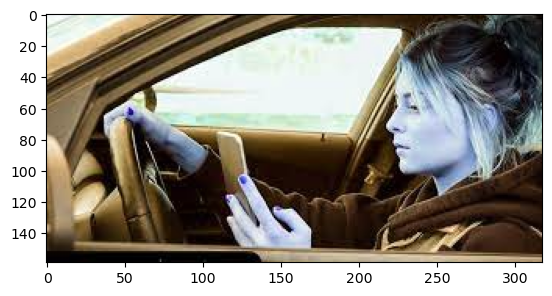

In [41]:
model_output1(r"C:\Users\MR.GODHADE\Desktop\SEM3\CP2\download (2).jpg")

1/1 [==============================] - 0s 51ms/step
[[0.7293816  0.01988862 0.00573479 0.00530479 0.23969014]]
[0]
AxesImage(80,52.8;496x369.6)
other_activities


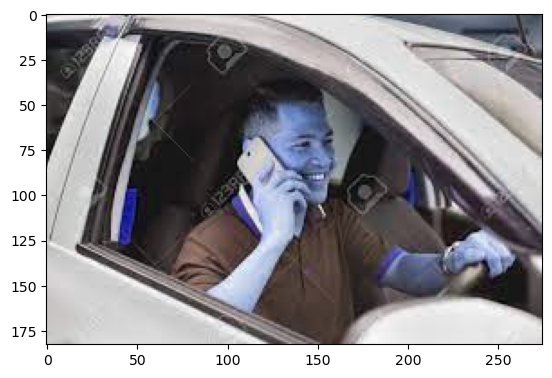

In [31]:
model_output1(r"C:\Users\MR.GODHADE\Desktop\SEM3\CP2\download.jpg")

1/1 [==============================] - 0s 62ms/step
[[0.04553794 0.01756924 0.01461461 0.00751502 0.9147632 ]]
[4]
AxesImage(80,52.8;496x369.6)
turning


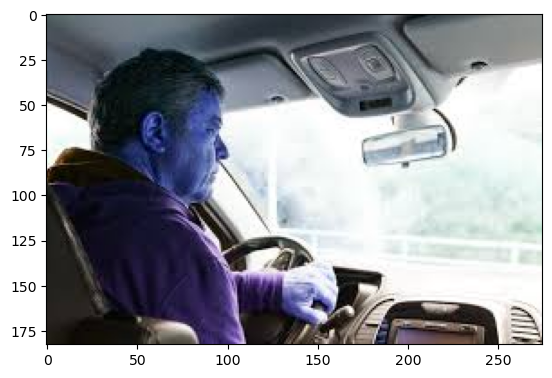

In [32]:
model_output1(r"C:\Users\MR.GODHADE\Desktop\SEM3\CP2\images.jpg")

In [33]:
trained_model.save("final_Diver_model.h5")

In [34]:
from keras.models import load_model

In [37]:
dmodel = load_model("final_Diver_model.h5")

1/1 [==============================] - 0s 132ms/step
[[0.7293816  0.01988862 0.00573479 0.00530479 0.23969014]]
[0]
AxesImage(80,52.8;496x369.6)
other_activities


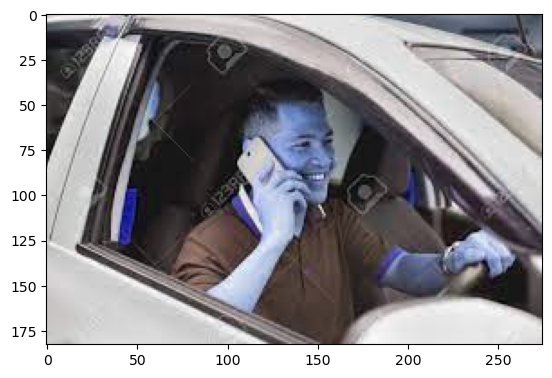

In [39]:
model_output1(r"C:\Users\MR.GODHADE\Desktop\SEM3\CP2\download.jpg")